In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [5]:
excel_file = 'BTC-HIS-TRAIN.xlsx'
data = pd.read_excel(excel_file)
(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
# Setting the datetime index as the date, only selecting the 'Close' column
data = data.set_index("Date")[['Close']]
data = data.set_index(pd.to_datetime(data.index))

In [7]:
data.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [8]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data.head()

,Close
Date,
2014-09-17,0.014453
2014-09-18,0.012751
2014-09-19,0.011216
2014-09-20,0.011947
2014-09-21,0.011425


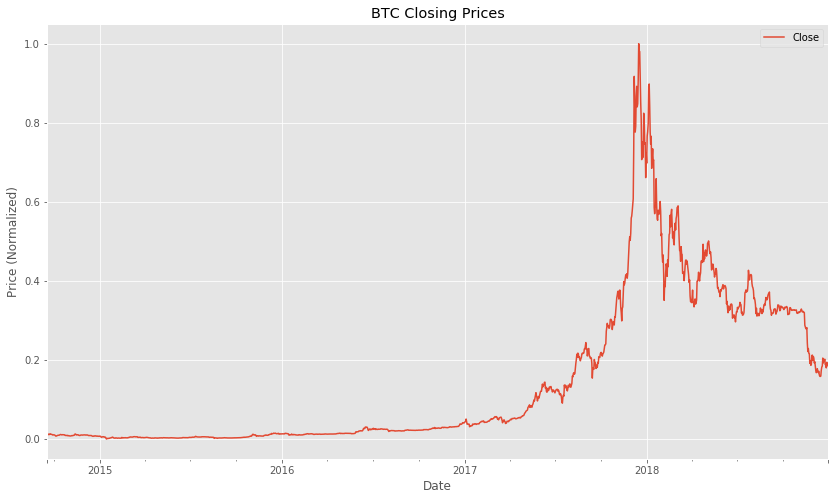

In [9]:
data.plot(figsize=(14,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

In [10]:
 data = data.values.tolist()

In [11]:
data

[[0.0144534768685077],
 [0.01275082628400891],
 [0.011216401330790552],
 [0.011946655734575522],
 [0.011424743483091082],
 [0.011597161451098272],
 [0.013338372651172617],
 [0.012686899787366049],
 [0.01208486019126706],
 [0.01171481479809348],
 [0.011460923629073881],
 [0.010304619207416297],
 [0.010215900142481138],
 [0.01080996884829051],
 [0.010637653575529406],
 [0.010195453280882397],
 [0.009390041071387013],
 [0.0078037517061475825],
 [0.007371231473678099],
 [0.00786653934149796],
 [0.008182700011083024],
 [0.009049863534597236],
 [0.009675455591778032],
 [0.009496153574248354],
 [0.009534301907749804],
 [0.010375429805343367],
 [0.010989582057261436],
 [0.011530802257290418],
 [0.011215211846539064],
 [0.01058283843508186],
 [0.010645055811598528],
 [0.011042792325680374],
 [0.010944652317721865],
 [0.01059779762299155],
 [0.010785692913693343],
 [0.010613998470963237],
 [0.00933336193975668],
 [0.009329635562004335],
 [0.008756426051629528],
 [0.009141171617082052],
 [0.00905

In [12]:
X = []
Y = []
seq_len = 30
num_records = len(data) - seq_len

for i in range(num_records):
    X.append(data[i:i+seq_len])
    Y.append(data[i+seq_len])
X = np.array(X)


Y = np.array(Y)

In [13]:
X[0]

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       [0.01194666],
       [0.01142474],
       [0.01159716],
       [0.01333837],
       [0.0126869 ],
       [0.01208486],
       [0.01171481],
       [0.01146092],
       [0.01030462],
       [0.0102159 ],
       [0.01080997],
       [0.01063765],
       [0.01019545],
       [0.00939004],
       [0.00780375],
       [0.00737123],
       [0.00786654],
       [0.0081827 ],
       [0.00904986],
       [0.00967546],
       [0.00949615],
       [0.0095343 ],
       [0.01037543],
       [0.01098958],
       [0.0115308 ],
       [0.01121521],
       [0.01058284]])

In [14]:
Y[0]

array([0.01064506])

In [15]:
X.shape

(1537, 30, 1)

In [16]:
Y.shape

(1537, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

#opt = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [19]:
model = Sequential()

In [20]:
model.add(LSTM(units=50, return_sequences= True, input_shape=(X.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [21]:
model.compile(optimizer=opt, loss='mse')

In [22]:
res = model.fit(X, Y, epochs=150, batch_size=25,validation_split=0.3)

Train on 1075 samples, validate on 462 samples
Epoch 1/150
1075/1075 [==============================] - 6s 5ms/step - loss: 0.0026 - val_loss: 0.1251
Epoch 2/150
1075/1075 [==============================] - 3s 3ms/step - loss: 0.0015 - val_loss: 0.0376
Epoch 3/150
1075/1075 [==============================] - 3s 3ms/step - loss: 3.8170e-04 - val_loss: 0.0105
Epoch 4/150
1075/1075 [==============================] - 3s 3ms/step - loss: 3.1021e-04 - val_loss: 0.0098
Epoch 5/150
1075/1075 [==============================] - 4s 3ms/step - loss: 3.1712e-04 - val_loss: 0.0097
Epoch 6/150
1075/1075 [==============================] - 4s 3ms/step - loss: 2.6622e-04 - val_loss: 0.0102
Epoch 7/150
1075/1075 [==============================] - 4s 3ms/step - loss: 3.1966e-04 - val_loss: 0.0095
Epoch 8/150
1075/1075 [==============================] - 4s 3ms/step - loss: 2.6936e-04 - val_loss: 0.0095
Epoch 9/150
1075/1075 [==============================] - 4s 3ms/step - loss: 2.8151e-04 - val_loss: 0.009

KeyboardInterrupt: 

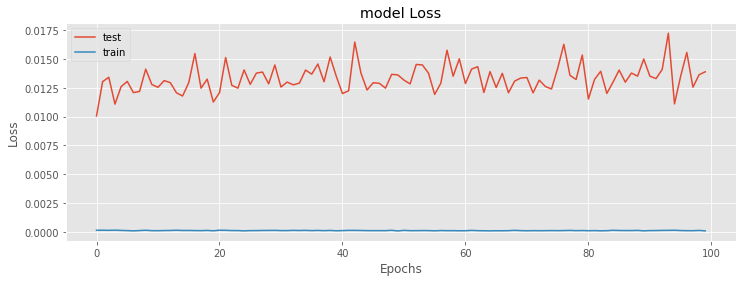

In [29]:
history = res.history
plt.figure(figsize=(12,4))
plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.legend(['test', 'train'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [35]:
excel_file1 = 'BTC-USD_TEST.xlsx'
data_test = pd.read_excel(excel_file1)
(data_test.head(12))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856835
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215218
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609823
5,2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,4076.632568,5597027439
6,2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637
7,2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305
8,2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905224
9,2019-01-10,4034.411377,4064.066650,3659.174561,3678.924561,3678.924561,6874143795


In [36]:
data_test = data_test.set_index("Date")[['Close']]
data_test = data_test.set_index(pd.to_datetime(data_test.index))

In [37]:
data_test.head()

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580


In [38]:
data_test = pd.DataFrame(scaler.fit_transform(data_test), columns=data_test.columns, index=data_test.index)
data_test.head()

,Close
Date,
2019-01-01,0.046174
2019-01-02,0.056561
2019-01-03,0.045470
2019-01-04,0.047651
2019-01-05,0.046349


In [39]:
data_test.shape

(340, 1)

In [40]:
data_test = data_test.values.tolist()

In [41]:
X_test = []
Y_test = []
seq_len_test = 10
num_records_test = len(data_test) - seq_len_test

for i in range(num_records_test):
    X_test.append(data_test[i:i+seq_len_test])
    Y_test.append(data_test[i+seq_len_test])
X_test= np.array(X_test)


Y_test = np.array(Y_test)

In [42]:
X_test.shape

(330, 10, 1)

In [43]:
Y_test.shape

(330, 1)

In [44]:
model.evaluate(X,Y)

1557/1557 [==============================] - 0s 160us/step


0.0013890657167177525

In [45]:
model.evaluate(X_test,Y_test)

330/330 [==============================] - 0s 182us/step


0.0046659529561910666

In [46]:
y_predicted = model.predict(X_test) 

In [47]:
y_predicted

array([[0.06365155],
       [0.05751652],
       [0.04986514],
       [0.04158618],
       [0.03564934],
       [0.03167496],
       [0.02915516],
       [0.02814428],
       [0.02778174],
       [0.02847724],
       [0.02856383],
       [0.02720432],
       [0.02545255],
       [0.02378059],
       [0.02241869],
       [0.0216303 ],
       [0.02122453],
       [0.02083837],
       [0.01907963],
       [0.015972  ],
       [0.01303595],
       [0.01048652],
       [0.00878131],
       [0.00830738],
       [0.00800497],
       [0.00747683],
       [0.00686911],
       [0.00573543],
       [0.00416265],
       [0.00556948],
       [0.00971261],
       [0.01513132],
       [0.01976813],
       [0.02301173],
       [0.0247991 ],
       [0.02530901],
       [0.02512366],
       [0.02485642],
       [0.02522362],
       [0.02891232],
       [0.03557381],
       [0.04364038],
       [0.05068896],
       [0.056407  ],
       [0.06257999],
       [0.06443482],
       [0.06325133],
       [0.060

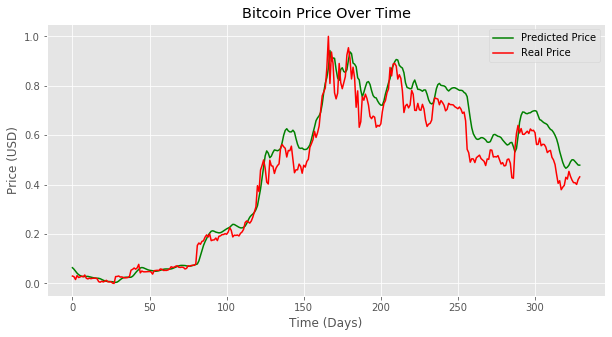

In [48]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Bitcoin Price Over Time")
plt.plot(y_predicted, color = 'green', label = 'Predicted Price')
plt.plot(Y_test, color = 'red', label = 'Real Price')
ax.set_ylabel("Price (USD)")
ax.set_xlabel("Time (Days)")
ax.legend()

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_predicted)

0.004665953154039622